## Create the figures used in Stochastic Variance Reduced Gradient Plug-and-Play Methods for Solving Image Reconnstruction Problems (ICIP 2021)

In [32]:
%matplotlib inline 

# from imports import *
import torch
import matplotlib.pyplot as plt
import numpy as np
from algorithms import *
from Utilities import display_results
import sys
sys.path.append('problems/')
sys.path.append('denoisers/')

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [33]:
from problems.CSMRI import CSMRI
from denoisers.BM3D import BM3DDenoiser

# Figures 1: Compare Image Fidelity for Different Algorithms 

In [34]:
im_height, im_width = 256, 256  # Image dimensions
samp_rate = 0.5                 # Pick a number 0 < SR <= 1
sigma_true = 5.0                # Select std dev of AWGN
snr = 20.

main_problem = CSMRI('./data/13.png', H=im_height, W=im_width, sample_prob=samp_rate, snr=snr)

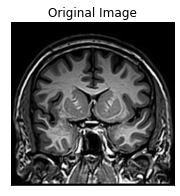

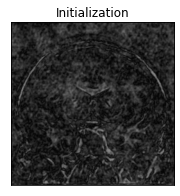

In [35]:
main_problem.display(show_measurements=False, save_results=True)

In [37]:
denoiser = BM3DDenoiser()
results_svrg = pnp_svrg(main_problem, denoiser=denoiser, eta=1e-2, tt=60, T2=10, mini_batch_size=100, verbose=True)

0 0 Before denoising:  12.679867828261422
After denoising update: 0 0 12.697709094059931
0 1 Before denoising:  12.738294945048395
After denoising update: 0 1 12.744661856460977
0 2 Before denoising:  12.785239457863982
After denoising update: 0 2 12.789310776037157
0 3 Before denoising:  12.826891532053724
After denoising update: 0 3 12.829797248003075
0 4 Before denoising:  12.870033334198457
After denoising update: 0 4 12.872197240662139
0 5 Before denoising:  12.912090247770657
After denoising update: 0 5 12.91378282759165
0 6 Before denoising:  12.954288009629309
After denoising update: 0 6 12.955573775943305
0 7 Before denoising:  12.9963668708941
After denoising update: 0 7 12.99739582432709
0 8 Before denoising:  13.036847116939384
After denoising update: 0 8 13.037803221846094
0 9 Before denoising:  13.07774414835735
After denoising update: 0 9 13.078415450368803
1 0 Before denoising:  13.117089579750916
After denoising update: 1 0 13.117291197187173
1 1 Before denoising:  13.

Output PSNR: 16.8	Change in PSNR: 8.73	Gradient Time: 51.89	Denoising Time: 51.89


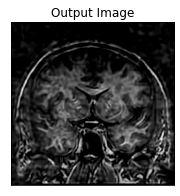

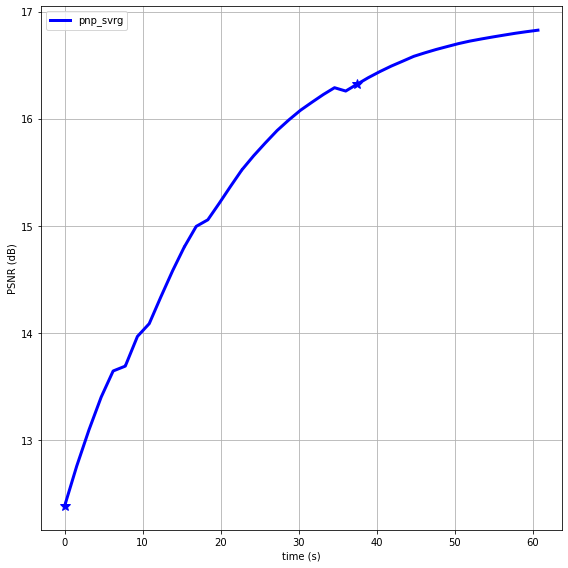

In [28]:
master_psnr_fig = display_results(main_problem, results_svrg, save_results=True)

In [22]:
denoiser = BM3DDenoiser()
results_sgd = pnp_sgd(main_problem, denoiser=denoiser, eta=1e-1, tt=10, mini_batch_size=1000, verbose=True)

0 Before denoising:  12.248358703810517
0 After denoising:  12.293229921165834
1 Before denoising:  12.150929401027515
1 After denoising:  12.176315110090098
2 Before denoising:  12.052764465646586
2 After denoising:  12.07632896199664
3 Before denoising:  11.951990699295239
3 After denoising:  11.975505365333426
4 Before denoising:  11.743591595855392
4 After denoising:  11.766766210202828
5 Before denoising:  11.648233004777236
5 After denoising:  11.671431328624495
6 Before denoising:  11.48899732498937
6 After denoising:  11.51172689258928
7 Before denoising:  11.38534917568216
7 After denoising:  11.411608256931835


In [ ]:
master_psnr_fig = display_results(main_problem, results_sgd, save_results=True)

In [ ]:
denoiser = BM3DDenoiser(sigma_est=.01)
results_gd = pnp_gd(main_problem, denoiser=denoiser, eta=1e-2, tt=10, verbose=True)

In [ ]:
master_psnr_fig = display_results(main_problem, results_gd, save_results=True)

In [ ]:
denoiser = BM3DDenoiser(sigma_est=.01)
results_saga = pnp_saga(main_problem, denoiser=denoiser, eta=1e-2, tt=10, mini_batch_size=1, verbose=True)

In [ ]:
master_psnr_fig = display_results(main_problem, results_saga, save_results=True)

In [ ]:
denoiser = BM3DDenoiser(sigma_est=.01)
results_sarah = pnp_sarah(main_problem, denoiser=denoiser, eta=1e-2, tt=10, T2=10, mini_batch_size=1, verbose=True)

In [ ]:
master_psnr_fig = display_results(main_problem, results_sarah, save_results=True)

# Figure 2(a): Compare PSNR over time using NLM

## Figure 2(b): Compare Sampling Ratio for each PnP Algorithm

## Figure 3: Compare Image Denoising Routines with PnP-SVRG using RGB Images